In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from itertools import combinations
import pandas as pd

In [2]:
# Text for analysis
sentence = 'the quick brown fox jumps over the lazy dog'

# Window size
window_size = 3

# Tokenize sentence into words
words = sentence.split()

co_occurrence_matrix = np.zeros((len(set(words)), len(set(words))), dtype=np.int32)
uw = 'the quick brown fox jumps over lazy dog'.split(' ')

# Process sentences
# for sentence in sentences:
# words = word_tokenize(sentence)
for i in range(len(words)):
    # get the words within the window
    window_words = words[i:min(len(words),i+window_size)]
    # get combinations of words
    for w1, w2 in combinations(window_words, 2):
        co_occurrence_matrix[uw.index(w1), uw.index(w2)] += 1

print(co_occurrence_matrix)

[[0 1 1 0 0 0 2 1]
 [0 0 2 1 0 0 0 0]
 [0 0 0 2 1 0 0 0]
 [0 0 0 0 2 1 0 0]
 [1 0 0 0 0 2 0 0]
 [2 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0]]


In [3]:
G = nx.from_numpy_array(co_occurrence_matrix)
# Use nx.from_numpy_matrix with create_using=nx.DiGraph to create a directed graph
# G = nx.from_numpy_matrix(co_occurrence_matrix, create_using=nx.DiGraph)

In [4]:
mapping = {i:label for i, label in enumerate(uw)}
H = nx.relabel_nodes(G, mapping)

# Draw the graph
pos = nx.spring_layout(H)  # positions for all nodes

weights = nx.get_edge_attributes(H, 'weight')

In [5]:
pos
# pos['brown'][1] = -.6

{'the': array([-0.11814693, -0.23477787]),
 'quick': array([ 0.85188441, -0.13423839]),
 'brown': array([0.62564019, 0.23611208]),
 'fox': array([0.50065395, 0.67018285]),
 'jumps': array([0.00905515, 0.62550454]),
 'over': array([-0.36979262,  0.29113923]),
 'lazy': array([-0.7396516 , -0.45392244]),
 'dog': array([-0.75964255, -1.        ])}

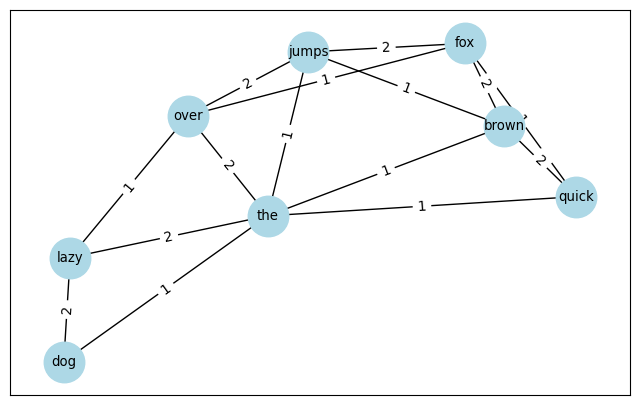

In [8]:
# Figure size
plt.figure(figsize=(8, 5))  # Increase DPI

# Draw nodes
nx.draw_networkx_nodes(H, pos, node_size=850, node_color='lightblue')  # Increase node size

# Draw node labels with lighter font
nx.draw_networkx_labels(H, pos, font_weight='light', font_size=9.5)

        
# Draw edges with weights
nx.draw_networkx_edges(H, pos)
edge_labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.show()

In [21]:
for key, value in pos.items():
    print(key, value)
    break

the [1.00000000e+00 1.83784272e-08]


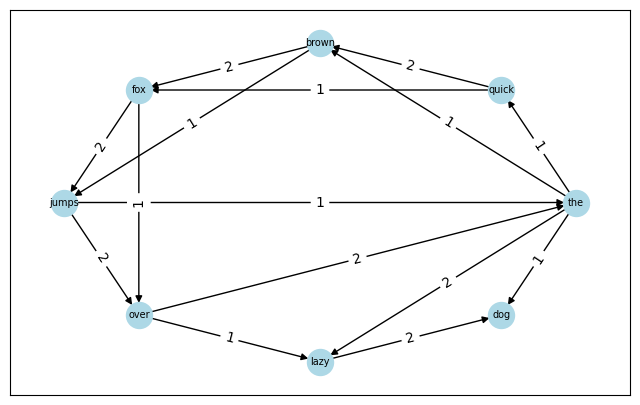

In [33]:
# Use nx.from_numpy_matrix with create_using=nx.DiGraph to create a directed graph
G = nx.from_numpy_matrix(co_occurrence_matrix, create_using=nx.DiGraph)

mapping = {i:label for i, label in enumerate(uw)}
H = nx.relabel_nodes(G, mapping)

# Figure size
plt.figure(figsize=(8, 5))

# Draw the graph
pos = nx.circular_layout(H)  # positions for all nodes

# Draw nodes with light blue color and alpha
nx.draw_networkx_nodes(H, pos, node_size=350, node_color='lightblue')  # Apply color and alpha

# Draw node labels with lighter font
nx.draw_networkx_labels(H, pos, font_weight='light', font_size=7)

# Draw edges with weights
nx.draw_networkx_edges(H, pos)
edge_labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.show()

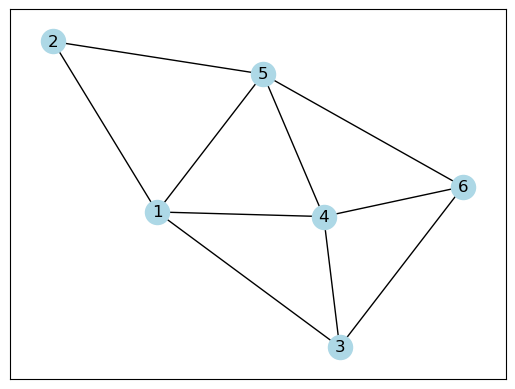

In [2]:
# Create a simple graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5),
                  (2, 5),
                  (3, 4), (3, 6), (4, 5), (4, 6), (5, 2), (5, 6)])

# Draw the graph
nx.draw_networkx(G, with_labels=True, node_color='lightblue')
plt.show()

In [72]:
[(1, 2), (1, 3), (1, 3), (1, 4), (1, 5), (2, 5), (3, 4), (3, 6), (4, 5), (4, 6), (5, 2), (5, 6),
                  (2, 2), (3, 3), (1, 3)]

[(1, 2),
 (1, 3),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 5),
 (3, 4),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 2),
 (5, 6),
 (2, 2),
 (3, 3),
 (1, 3)]

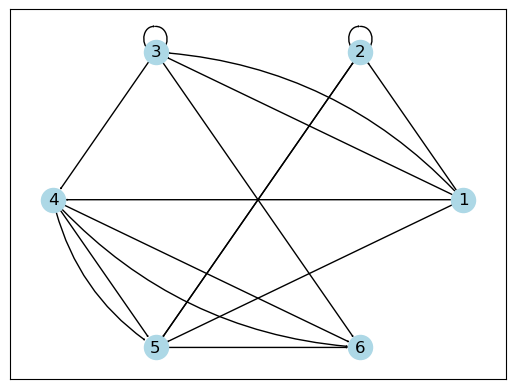

In [84]:
# Create a multigraph
MG = nx.MultiDiGraph()
MG.add_edges_from([(1, 2), (1, 3), (1, 3), (1, 4), (1, 5),
                  (2, 5), (2, 2),
                  (3, 4), (3, 6), (3, 3), (4, 5), (4, 6), (4, 5), (4, 6), (5, 2), (5, 6)])

# Calculate the layout
pos = nx.circular_layout(MG)

# Draw nodes
nx.draw_networkx_nodes(MG, pos, node_color='lightblue')
# Draw labels
nx.draw_networkx_labels(MG, pos)

# Draw edges with a curvature for the second edge
edge_count = {}
for node1, node2 in MG.edges():
    if (node1, node2) in edge_count:
        edge_count[(node1, node2)] += 1
    else:
        edge_count[(node1, node2)] = 1

    if edge_count[(node1, node2)] == 1:
        # This is the first edge, draw it straight
        nx.draw_networkx_edges(MG, pos, edgelist=[(node1, node2)], arrowsize=1)
    else:
        # This is the second (or later) edge, draw it with a curvature
        # rad = 0.2 * edge_count[(node1, node2)]
        rad = .2
        nx.draw_networkx_edges(MG, pos, edgelist=[(node1, node2)], connectionstyle=f'arc3, rad={rad}', arrowsize=1)

plt.show()

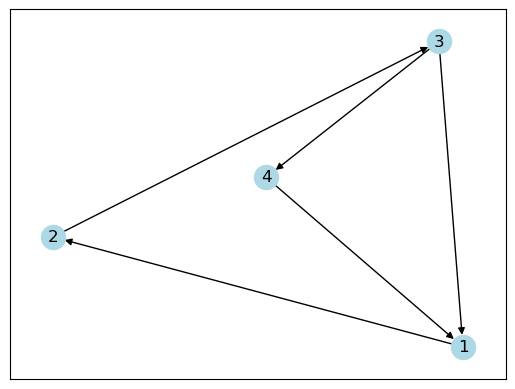

In [87]:
# Create a directed graph
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (3, 1)])

# Draw the directed graph
nx.draw_networkx(DG, with_labels=True, node_color='lightblue')
plt.show()

{1: array([-0.17731498, -0.59024245]), 2: array([ 0.62924473, -0.18088911]), 3: array([0.44949202, 1.        ]), 4: array([-0.90142177, -0.22886844])}


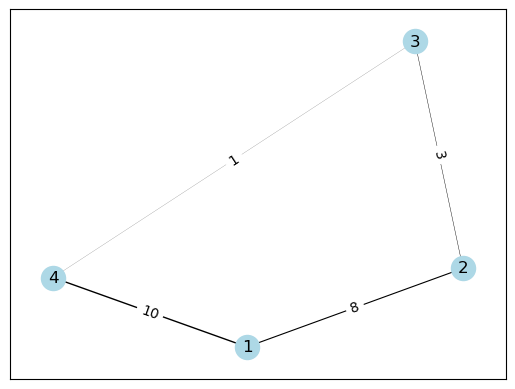

In [114]:
# Create a weighted graph
WG = nx.Graph()
WG.add_edge(1, 2, weight=8)
WG.add_edge(2, 3, weight=3)
WG.add_edge(3, 4, weight=1)
WG.add_edge(4, 1, weight=10)

pos = nx.spring_layout(WG)  # positions for all nodes
print(pos)
# nodes
nx.draw_networkx_nodes(WG, pos, node_color='lightblue')

# edges
nx.draw_networkx_edges(WG, pos, width=[d['weight']/10 for (u, v, d) in WG.edges(data=True)])

# labels
nx.draw_networkx_labels(WG, pos)

edge_labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=edge_labels)

plt.show()

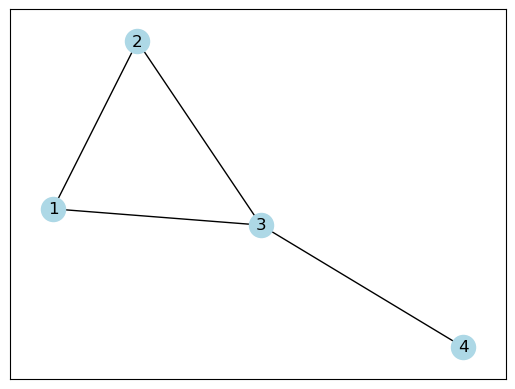

In [129]:
# Create a connected graph
CG = nx.Graph()
CG.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])

# Draw the connected graph
nx.draw_networkx(CG, with_labels=True, node_color='lightblue')
plt.show()

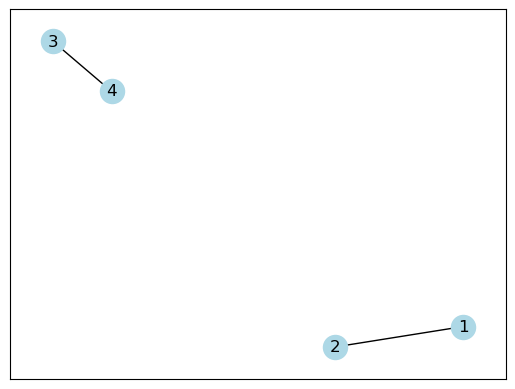

In [128]:
# Create a disconnected graph
DG = nx.Graph()
DG.add_edges_from([(1, 2), (3, 4),])

pos = nx.spring_layout(DG)

# Draw the disconnected graph
nx.draw_networkx(DG, pos, with_labels=True, node_color='lightblue')
plt.show()